In [1]:
import pandas as pd
import json
from collections import Counter

import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

from matplotlib import pyplot as plt

import seaborn as sns

In [2]:
data_dir = '2021-07-19'

method = 'scibert'
# method = 'tfidf'
# method = 'glove'

# time_window = 1
time_window = 6

contain_zero = False
# contain_zero = True

In [4]:
valid_samples = pd.read_csv(f'指标初步探索/valid_samples_{data_dir}_{method}_timewindow_{time_window}.csv',sep='\t')

In [5]:
if not contain_zero:
    valid_samples = valid_samples.loc[valid_samples['count']>0]

In [6]:
all_year_month = ['2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10',
                 '2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05']

In [7]:
year_months_train = all_year_month[1:-time_window-1]
year_months_test = all_year_month[-time_window-1:-time_window]

In [7]:
year_months_train

['2020-02',
 '2020-03',
 '2020-04',
 '2020-05',
 '2020-06',
 '2020-07',
 '2020-08',
 '2020-09',
 '2020-10']

In [8]:
valid_samples_train = valid_samples.loc[valid_samples['publish_year_month'].isin(year_months_train)]

In [9]:
valid_samples_test = valid_samples.loc[valid_samples['publish_year_month'].isin(year_months_test)]

In [10]:
valid_samples_train.shape,valid_samples_test.shape

((2701, 12), (193, 12))

In [11]:
# valid_samples_train

In [11]:
def func(x,params):
#     print(x)   
    return x.dot(params[1:])+params[0]

In [32]:
X = 1-valid_samples_train[['mean_cos_distance']].values
y = valid_samples_train['count'].values
X2 = sm.add_constant(X,prepend=True,has_constant=True)
est = sm.OLS(y, X2)
results = est.fit()
# print(results.summary())

In [14]:
results_as_html = results.summary().tables[1].as_html()
pd.read_html(results_as_html, header=0, index_col=0)[0]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-1.2204,1.766,-0.691,0.49,-4.684,2.243
x1,5.3736,2.480,2.166,0.03,0.510,10.237


In [33]:
X = valid_samples_train[['min_cos_distance']].values
y = valid_samples_train['count'].values
X2 = sm.add_constant(X,prepend=True,has_constant=True)
est = sm.OLS(y, X2)
results = est.fit()
# print(results.summary())

In [16]:
results_as_html = results.summary().tables[1].as_html()
pd.read_html(results_as_html, header=0, index_col=0)[0].round(4)

,coef,std err,t,P>|t|,[0.025,0.975]
const,0.4227,0.311,1.360,0.174,-0.187,1.032
x1,14.4501,1.871,7.722,0.000,10.781,18.119


In [87]:
X = valid_samples_train[['mean_cos_distance','min_cos_distance']].values
X[:, 0] = 1-X[:, 0]
y = valid_samples_train['count'].values
X2 = sm.add_constant(X,prepend=True,has_constant=True)
est = sm.OLS(y, X2)
results = est.fit()
# print(results.summary())

In [18]:
results_as_html = results.summary().tables[1].as_html()
pd.read_html(results_as_html, header=0, index_col=0)[0].round(4)

,coef,std err,t,P>|t|,[0.025,0.975]
const,-8.7433,1.938,-4.511,0.0,-12.544,-4.943
x1,12.3029,2.568,4.791,0.0,7.267,17.338
x2,17.3098,1.957,8.846,0.0,13.473,21.147


In [88]:
results.params

array([-8.74329771, 12.30290874, 17.30982684])

In [18]:
def plot_anchors(anchors, ax):
    x = [a[0]*100+100 for a in anchors]
    y = [a[1]*100+100 for a in anchors]
    sns.scatterplot(x=x,y=y, marker='^', color='red', ax=ax, s=150)
    #hide x-axis
    ax.get_xaxis().set_visible(False)
    #hide y-axis 
    ax.get_yaxis().set_visible(False)

In [4]:
x1 = (np.expand_dims(np.arange(-100,101), axis=0).repeat(201, axis=0))/100
x2 = x1.T


NameError: name 'plot_anchors' is not defined

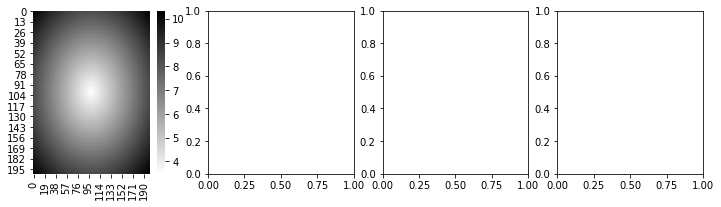

In [3]:
x1 = (np.expand_dims(np.arange(-100,101), axis=0).repeat(201, axis=0))/100
x2 = x1.T

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,3))

for row_, time_window in enumerate([1]):
    data_dir = '2021-07-19'

    method = 'scibert'
    # method = 'tfidf'
    # method = 'glove'

    # time_window = 1
    time_window = 6

    contain_zero = False
    # contain_zero = True

    valid_samples = pd.read_csv(f'指标初步探索/valid_samples_{data_dir}_{method}_timewindow_{time_window}.csv',sep='\t')

    if not contain_zero:
        valid_samples = valid_samples.loc[valid_samples['count']>0]

    all_year_month = ['2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10',
                     '2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05']

    year_months_train = all_year_month[1:-time_window-1]
    year_months_test = all_year_month[-time_window-1:-time_window]

    valid_samples_train = valid_samples.loc[valid_samples['publish_year_month'].isin(year_months_train)]
    valid_samples_test = valid_samples.loc[valid_samples['publish_year_month'].isin(year_months_test)]

    valid_samples_train = pd.concat([valid_samples_train, valid_samples_test], axis=0)

    X = valid_samples_train[['mean_cos_distance','min_cos_distance']].values
    X[:, 0] = 1-X[:, 0]
    y = valid_samples_train['count'].values
    X2 = sm.add_constant(X,prepend=True,has_constant=True)
    est = sm.OLS(y, X2)
    results = est.fit()

    anchors = [[-0.0, 0.0]]
    dists = []
    for anchor in anchors:
        dist = np.sqrt((x1-anchor[0])**2 + (x2-anchor[1])**2)
        dist = np.expand_dims(dist, axis=-1)
        dists.append(dist)
    dists = np.concatenate(dists, axis=-1)
    min_dist = dists.min(axis=-1)
    mean_dist = 1-dists.mean(axis=-1)
    values = mean_dist*results.params[1]+min_dist*results.params[2]+results.params[0]
    values[values<0] = 0
    sns.heatmap(values, cmap='binary', ax = axes[0])
    plot_anchors(anchors, axes[0])
    
    anchors = [[-0.5, 0.0], [0.5, 0.0]]
    dists = []
    for anchor in anchors:
        dist = np.sqrt((x1-anchor[0])**2 + (x2-anchor[1])**2)
        dist = np.expand_dims(dist, axis=-1)
        dists.append(dist)
    dists = np.concatenate(dists, axis=-1)
    min_dist = dists.min(axis=-1)
    mean_dist = 1-dists.mean(axis=-1)
    values = mean_dist*results.params[1]+min_dist*results.params[2]+results.params[0]
    values[values<0] = 0
    sns.heatmap(values, cmap='binary', ax = axes[1])
    plot_anchors(anchors, axes[1])
    
    anchors = [[0.0, 0.5], [0.5, -0.5], [-0.5, -0.5]]
    dists = []
    for anchor in anchors:
        dist = np.sqrt((x1-anchor[0])**2 + (x2-anchor[1])**2)
        dist = np.expand_dims(dist, axis=-1)
        dists.append(dist)
    dists = np.concatenate(dists, axis=-1)
    min_dist = dists.min(axis=-1)
    mean_dist = 1-dists.mean(axis=-1)
    values = mean_dist*results.params[1]+min_dist*results.params[2]+results.params[0]
    values[values<0] = 0
    sns.heatmap(values, cmap='binary', ax = axes[2])
    plot_anchors(anchors, axes[2])
    
    anchors = [[np.random.uniform(-0.8,0.8,1)[0], np.random.uniform(-0.8,0.8,1)[0]] for i in range(10)]
    dists = []
    for anchor in anchors:
        dist = np.sqrt((x1-anchor[0])**2 + (x2-anchor[1])**2)
        dist = np.expand_dims(dist, axis=-1)
        dists.append(dist)
    dists = np.concatenate(dists, axis=-1)
    min_dist = dists.min(axis=-1)
    mean_dist = 1-dists.mean(axis=-1)
    values = mean_dist*results.params[1]+min_dist*results.params[2]+results.params[0]
    values[values<0] = 0
    sns.heatmap(values, cmap='binary', ax = axes[3])
    plot_anchors(anchors, axes[3])
    
fig.tight_layout()
fig.savefig('metric_case.png', dpi=200)

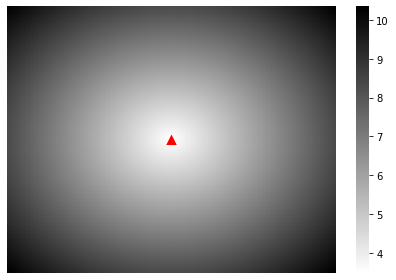

In [6]:
data_dir = '2021-07-19'

method = 'scibert'
# method = 'tfidf'
# method = 'glove'

# time_window = 1
time_window = 6

contain_zero = False
# contain_zero = True

valid_samples = pd.read_csv(f'指标初步探索/valid_samples_{data_dir}_{method}_timewindow_{time_window}.csv',sep='\t')

if not contain_zero:
    valid_samples = valid_samples.loc[valid_samples['count']>0]

all_year_month = ['2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10',
                 '2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05']

year_months_train = all_year_month[1:-time_window-1]
year_months_test = all_year_month[-time_window-1:-time_window]

valid_samples_train = valid_samples.loc[valid_samples['publish_year_month'].isin(year_months_train)]
valid_samples_test = valid_samples.loc[valid_samples['publish_year_month'].isin(year_months_test)]

valid_samples_train = pd.concat([valid_samples_train, valid_samples_test], axis=0)

X = valid_samples_train[['mean_cos_distance','min_cos_distance']].values
X[:, 0] = 1-X[:, 0]
y = valid_samples_train['count'].values
X2 = sm.add_constant(X,prepend=True,has_constant=True)
est = sm.OLS(y, X2)
results = est.fit()
anchors = [[-0.0, 0.0]]
dists = []
for anchor in anchors:
    dist = np.sqrt((x1-anchor[0])**2 + (x2-anchor[1])**2)
    dist = np.expand_dims(dist, axis=-1)
    dists.append(dist)
dists = np.concatenate(dists, axis=-1)
min_dist = dists.min(axis=-1)
mean_dist = 1-dists.mean(axis=-1)
values = mean_dist*results.params[1]+min_dist*results.params[2]+results.params[0]
values[values<0] = 0
sns.heatmap(values, cmap='binary')
x = [a[0]*100+100 for a in anchors]
y = [a[1]*100+100 for a in anchors]
sns.scatterplot(x=x,y=y, marker='^', color='red',s=150)
#hide x-axis
# plt.get_xaxis().set_visible(False)
# #hide y-axis 
# plt.get_yaxis().set_visible(False)
plt.axis('off')
plt.tight_layout()
plt.savefig(f'toy_metric/metric_case_1_time_window{time_window}.png', dpi=500)

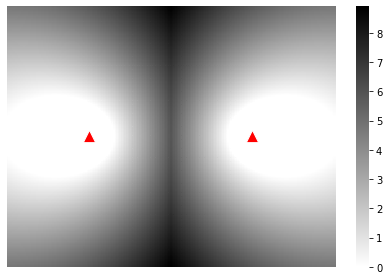

In [8]:
data_dir = '2021-07-19'

method = 'scibert'
# method = 'tfidf'
# method = 'glove'

# time_window = 1
time_window = 6

contain_zero = False
# contain_zero = True

valid_samples = pd.read_csv(f'指标初步探索/valid_samples_{data_dir}_{method}_timewindow_{time_window}.csv',sep='\t')

if not contain_zero:
    valid_samples = valid_samples.loc[valid_samples['count']>0]

all_year_month = ['2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10',
                 '2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05']

year_months_train = all_year_month[1:-time_window-1]
year_months_test = all_year_month[-time_window-1:-time_window]

valid_samples_train = valid_samples.loc[valid_samples['publish_year_month'].isin(year_months_train)]
valid_samples_test = valid_samples.loc[valid_samples['publish_year_month'].isin(year_months_test)]

valid_samples_train = pd.concat([valid_samples_train, valid_samples_test], axis=0)

X = valid_samples_train[['mean_cos_distance','min_cos_distance']].values
X[:, 0] = 1-X[:, 0]
y = valid_samples_train['count'].values
X2 = sm.add_constant(X,prepend=True,has_constant=True)
est = sm.OLS(y, X2)
results = est.fit()
anchors = [[-0.5, 0.0], [0.5, 0.0]]
dists = []
for anchor in anchors:
    dist = np.sqrt((x1-anchor[0])**2 + (x2-anchor[1])**2)
    dist = np.expand_dims(dist, axis=-1)
    dists.append(dist)
dists = np.concatenate(dists, axis=-1)
min_dist = dists.min(axis=-1)
mean_dist = 1-dists.mean(axis=-1)
values = mean_dist*results.params[1]+min_dist*results.params[2]+results.params[0]
values[values<0] = 0
sns.heatmap(values, cmap='binary')
x = [a[0]*100+100 for a in anchors]
y = [a[1]*100+100 for a in anchors]
sns.scatterplot(x=x,y=y, marker='^', color='red',s=150)
#hide x-axis
# plt.get_xaxis().set_visible(False)
# #hide y-axis 
# plt.get_yaxis().set_visible(False)
plt.axis('off')
plt.tight_layout()
plt.savefig(f'toy_metric/metric_case_2_time_window{time_window}.png', dpi=500)

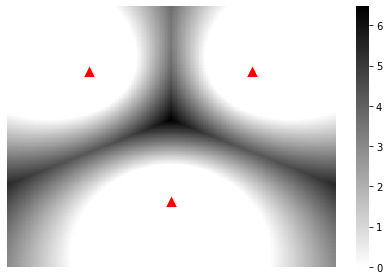

In [10]:
data_dir = '2021-07-19'

method = 'scibert'
# method = 'tfidf'
# method = 'glove'

# time_window = 1
time_window = 6

contain_zero = False
# contain_zero = True

valid_samples = pd.read_csv(f'指标初步探索/valid_samples_{data_dir}_{method}_timewindow_{time_window}.csv',sep='\t')

if not contain_zero:
    valid_samples = valid_samples.loc[valid_samples['count']>0]

all_year_month = ['2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10',
                 '2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05']

year_months_train = all_year_month[1:-time_window-1]
year_months_test = all_year_month[-time_window-1:-time_window]

valid_samples_train = valid_samples.loc[valid_samples['publish_year_month'].isin(year_months_train)]
valid_samples_test = valid_samples.loc[valid_samples['publish_year_month'].isin(year_months_test)]

valid_samples_train = pd.concat([valid_samples_train, valid_samples_test], axis=0)

X = valid_samples_train[['mean_cos_distance','min_cos_distance']].values
X[:, 0] = 1-X[:, 0]
y = valid_samples_train['count'].values
X2 = sm.add_constant(X,prepend=True,has_constant=True)
est = sm.OLS(y, X2)
results = est.fit()
anchors = [[0.0, 0.5], [0.5, -0.5], [-0.5, -0.5]]
dists = []
for anchor in anchors:
    dist = np.sqrt((x1-anchor[0])**2 + (x2-anchor[1])**2)
    dist = np.expand_dims(dist, axis=-1)
    dists.append(dist)
dists = np.concatenate(dists, axis=-1)
min_dist = dists.min(axis=-1)
mean_dist = 1-dists.mean(axis=-1)
values = mean_dist*results.params[1]+min_dist*results.params[2]+results.params[0]
values[values<0] = 0
sns.heatmap(values, cmap='binary')
x = [a[0]*100+100 for a in anchors]
y = [a[1]*100+100 for a in anchors]
sns.scatterplot(x=x,y=y, marker='^', color='red',s=150)
#hide x-axis
# plt.get_xaxis().set_visible(False)
# #hide y-axis 
# plt.get_yaxis().set_visible(False)
plt.axis('off')
plt.tight_layout()
plt.savefig(f'toy_metric/metric_case_3_time_window{time_window}.png', dpi=500)

In [24]:
import random

In [79]:
anchors = [[random.Random(i).uniform(-0.8,0.8), random.Random(i+1).uniform(-0.8,0.8)] for i in  random.Random(0).sample(range(100),10)]

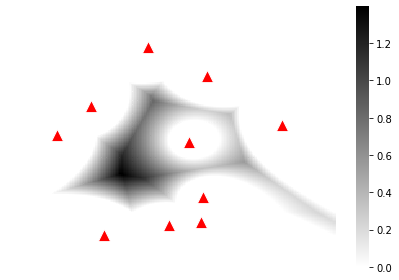

In [81]:
data_dir = '2021-07-19'

method = 'scibert'
# method = 'tfidf'
# method = 'glove'

time_window = 1
# time_window = 6

contain_zero = False
# contain_zero = True

valid_samples = pd.read_csv(f'指标初步探索/valid_samples_{data_dir}_{method}_timewindow_{time_window}.csv',sep='\t')

if not contain_zero:
    valid_samples = valid_samples.loc[valid_samples['count']>0]

all_year_month = ['2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10',
                 '2020-11','2020-12','2021-01','2021-02','2021-03','2021-04','2021-05']

year_months_train = all_year_month[1:-time_window-1]
year_months_test = all_year_month[-time_window-1:-time_window]

valid_samples_train = valid_samples.loc[valid_samples['publish_year_month'].isin(year_months_train)]
valid_samples_test = valid_samples.loc[valid_samples['publish_year_month'].isin(year_months_test)]

valid_samples_train = pd.concat([valid_samples_train, valid_samples_test], axis=0)

X = valid_samples_train[['mean_cos_distance','min_cos_distance']].values
X[:, 0] = 1-X[:, 0]
y = valid_samples_train['count'].values
X2 = sm.add_constant(X,prepend=True,has_constant=True)
est = sm.OLS(y, X2)
results = est.fit()
dists = []
for anchor in anchors:
    dist = np.sqrt((x1-anchor[0])**2 + (x2-anchor[1])**2)
    dist = np.expand_dims(dist, axis=-1)
    dists.append(dist)
dists = np.concatenate(dists, axis=-1)
min_dist = dists.min(axis=-1)
mean_dist = 1-dists.mean(axis=-1)
values = mean_dist*results.params[1]+min_dist*results.params[2]+results.params[0]
values[values<0] = 0
sns.heatmap(values, cmap='binary')
x = [a[0]*100+100 for a in anchors]
y = [a[1]*100+100 for a in anchors]
sns.scatterplot(x=x,y=y, marker='^', color='red',s=150)
#hide x-axis
# plt.get_xaxis().set_visible(False)
# #hide y-axis 
# plt.get_yaxis().set_visible(False)
plt.axis('off')
plt.tight_layout()
plt.savefig(f'toy_metric/metric_case_10_time_window{time_window}.png', dpi=500)